In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import constants as c

In [2]:
def read_csv_file(api: str, method: str, n_requests: str)-> pd.DataFrame:
   file_path = get_file_path(api, method, n_requests)
   return pd.read_csv(file_path)

def get_file_path(api: str, method: str, n_requests)-> str:
   if api == c.API_GRPC:
      data_dir = c.GRPC_DATA_DIRECTORY
   elif api == c.API_REST:
      data_dir = c.REST_DATA_DIRECTORY
   else:
      raise ValueError()
   file_name = "secure" + "_" + method + "_" + str(n_requests)
   return data_dir + file_name + ".csv"
   

   
   

In [3]:
grpc_response_times = []
for n_req in c.N_REQUESTS_LIST:
   df = read_csv_file("grpc", "get", n_req)
   value = df.mean()[c.AVERAGE_RESPONSE_TIME_MS_KEY]
   grpc_response_times.append(value)

In [4]:
grpc_response_times

[np.float64(2.7307498455047607),
 np.float64(2.502647638320923),
 np.float64(2.608398115634918)]

In [ ]:
def make_bar_chart(api: str, method: str, metric: str):
   # Plotting as a bar chart
   bins = ["100", "1000", "10000"]
   if metric == c.AVERAGE_RESPONSE_TIME_MS_KEY:
      data = get_data_response_time(api, method)
   elif metric == c.REQUEST_PER_SEC_KEY:
      data = get_data_request_per_sec(api, method)
   else:
      raise ValueError()
   
   ax = plt.gca()
   ax.spines['top'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['right'].set_visible(False)
   
   plt.bar(bins, data, color='blue', alpha=0.7)

def get_data_response_time(api: str, method: str):
   response_times = []
   for n_req in c.N_REQUESTS_LIST:
      df = read_csv_file(api, method, n_req)
      value = df.mean()[c.AVERAGE_RESPONSE_TIME_MS_KEY]
      response_times.append(value)
   return response_times

def get_data_request_per_sec(api: str, method: str):
   request_per_sec_data = []
   for n_req in c.N_REQUESTS_LIST:
      df = read_csv_file(api, method, n_req)
      value = df.mean()[c.REQUEST_PER_SEC_KEY]
      request_per_sec_data.append(value)
   return request_per_sec_data


[np.float64(318.11812138739447), np.float64(355.03285602508754), np.float64(339.7950070864839)]


Text(0.5, 1.0, 'grpcget')

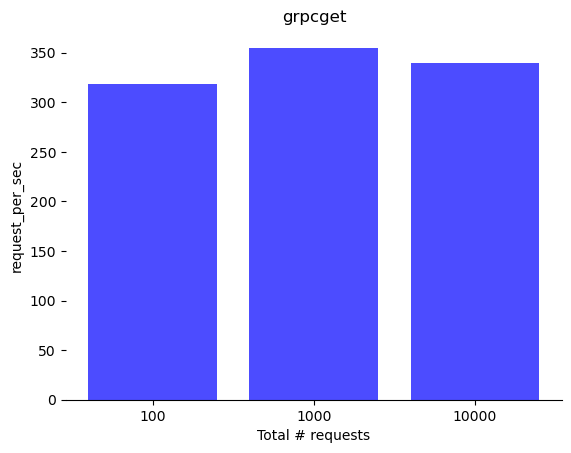

In [ ]:
# Plotting as a bar chart
make_bar_chart(c.API_GRPC, c.METHOD_GET, c.REQUEST_PER_SEC_KEY)
plt.xlabel("Total # requests")
plt.ylabel(c.REQUEST_PER_SEC_KEY)
plt.title(f"{c.API_GRPC} - {c.METHOD_GET}")